👤 Profile: tourist
🏅 Rating: 3777
📈 Max Rating: 4009
🎖 Rank: legendary grandmaster
💬 Contribution: 108

📄 Total submissions: 100
✅ Accepted: 75


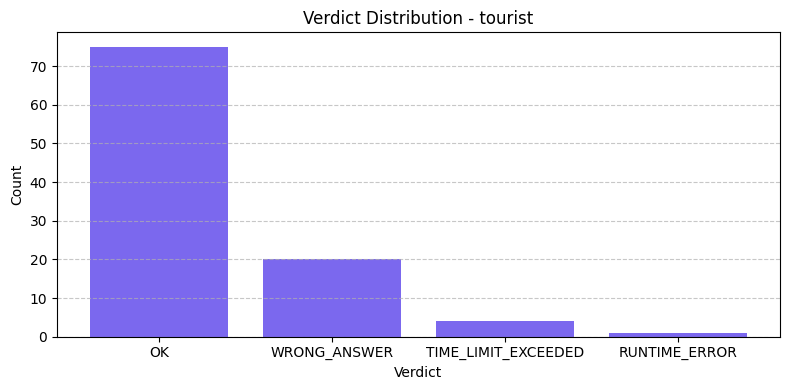

C:\Users\Hemanth Singh\AppData\Local\Temp\ipykernel_408\3136933744.py:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Hemanth Singh\OneDrive\Desktop\LeetcodeCodeforces Profile Analyzer\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


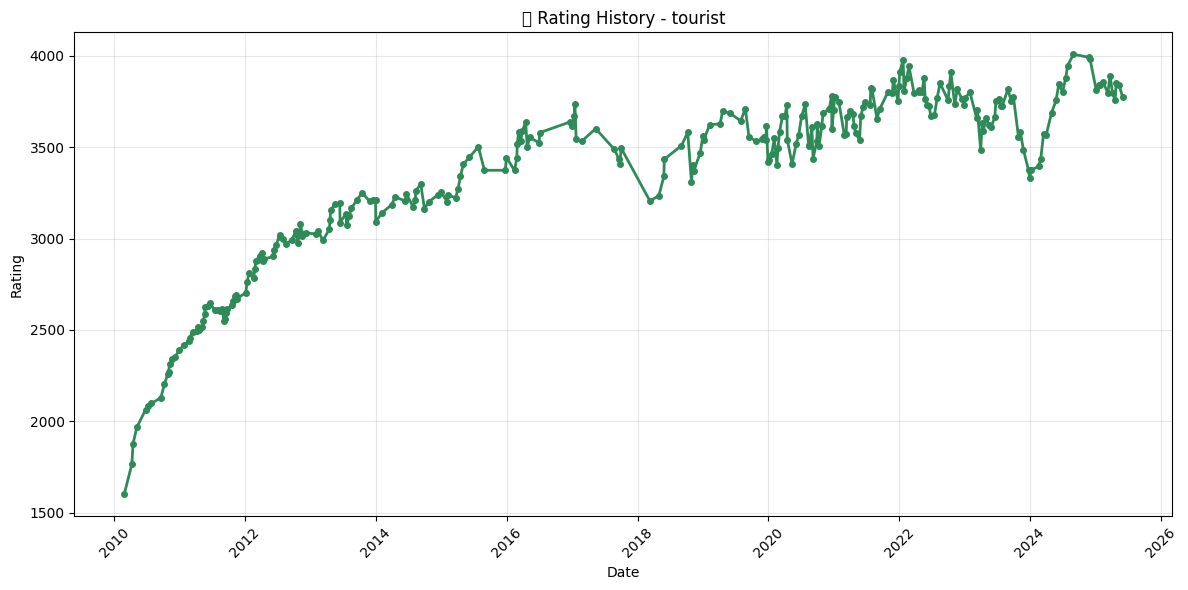

📌 Contests: 282 | Current: 3777 | Max: 4009


In [8]:
#📌 Codeforces Profile Analyzer
# Enter your handle and see your stats and charts!

import requests
import matplotlib.pyplot as plt
from datetime import datetime

# Function to get user info
def get_user_info(handle):
    url = f'https://codeforces.com/api/user.info?handles={handle}'
    response = requests.get(url)
    data = response.json()

    if data['status'] == 'OK':
        user = data['result'][0]
        print(f"👤 Profile: {handle}")
        print(f"🏅 Rating: {user.get('rating', 'N/A')}")
        print(f"📈 Max Rating: {user.get('maxRating', 'N/A')}")
        print(f"🎖 Rank: {user.get('rank', 'N/A')}")
        print(f"💬 Contribution: {user.get('contribution', 'N/A')}")
    else:
        print('❌ Failed to fetch user info:', data.get('comment', 'Unknown error'))

# Function to fetch and plot verdicts
def fetch_and_plot_verdicts(handle, count=100):
    url = f'https://codeforces.com/api/user.status?handle={handle}&count={count}'
    response = requests.get(url)
    data = response.json()

    if data['status'] == 'OK':
        submissions = data['result']
        verdicts = {}
        for sub in submissions:
            verdict = sub.get('verdict', 'UNKNOWN')
            verdicts[verdict] = verdicts.get(verdict, 0) + 1

        print(f"\n📄 Total submissions: {len(submissions)}")
        print(f"✅ Accepted: {verdicts.get('OK', 0)}")

        # Bar chart
        plt.figure(figsize=(8, 4))
        plt.bar(verdicts.keys(), verdicts.values(), color='mediumslateblue')
        plt.title(f'Verdict Distribution - {handle}')
        plt.xlabel('Verdict')
        plt.ylabel('Count')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print('❌ Failed to fetch submissions:', data.get('comment', 'Unknown error'))

# Function to plot rating history
def plot_rating_history(handle):
    url = f'https://codeforces.com/api/user.rating?handle={handle}'
    response = requests.get(url)
    data = response.json()

    if data['status'] == 'OK':
        rating_history = data['result']
        if not rating_history:
            print("No contests found.")
            return

        ratings = [entry['newRating'] for entry in rating_history]
        times = [datetime.fromtimestamp(entry['ratingUpdateTimeSeconds']) for entry in rating_history]

        plt.figure(figsize=(12, 6))
        plt.plot(times, ratings, marker='o', linewidth=2, markersize=4, color='seagreen')
        plt.title(f'📊 Rating History - {handle}')
        plt.xlabel('Date')
        plt.ylabel('Rating')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print(f"📌 Contests: {len(ratings)} | Current: {ratings[-1]} | Max: {max(ratings)}")
    else:
        print('❌ Failed to fetch rating history:', data.get('comment', 'Unknown error'))

# --- 🔽 Input Handle and Run ---
handle = input("Enter your Codeforces handle: ").strip()
get_user_info(handle)
fetch_and_plot_verdicts(handle)
plot_rating_history(handle)

In [9]:
def analyze_submission_accuracy(handle, count=100):
    url = f'https://codeforces.com/api/user.status?handle={handle}&count={count}'
    response = requests.get(url)
    data = response.json()
    if data['status'] != 'OK':
        print("Failed to fetch submissions.")
        return
    submissions = data['result']
    total = len(submissions)
    accepted = sum(1 for sub in submissions if sub.get('verdict') == 'OK')
    accuracy = (accepted / total) * 100 if total else 0
    print(f"🧠 Smart Insights:")
    print(f"➤ Total Submissions: {total}")
    print(f"➤ Accepted: {accepted}")
    print(f"➤ Accuracy: {accuracy:.2f}%")
    problem_tags = {}
    for sub in submissions:
        if sub.get('verdict') == 'OK' and 'problem' in sub and 'tags' in sub['problem']:
            for tag in sub['problem']['tags']:
                problem_tags[tag] = problem_tags.get(tag, 0) + 1
    top_tags = sorted(problem_tags.items(), key=lambda x: x[1], reverse=True)[:5]
    print("\n🏷️ Top 5 Tags in Accepted Problems:")
    for tag, count in top_tags:
        print(f"  • {tag} - {count} problems")

In [10]:
analyze_submission_accuracy(handle)

🧠 Smart Insights:
➤ Total Submissions: 100
➤ Accepted: 75
➤ Accuracy: 75.00%

🏷️ Top 5 Tags in Accepted Problems:
  • greedy - 30 problems
  • math - 27 problems
  • dp - 27 problems
  • constructive algorithms - 22 problems
  • data structures - 20 problems


In [11]:
import requests
import matplotlib.pyplot as plt

def analyze_leetcode_profile(username):
    url = 'https://leetcode.com/graphql'
    query = {
        "query": """
        query userProfile($username: String!) {
          matchedUser(username: $username) {
            submitStats {
              acSubmissionNum {
                difficulty
                count
              }
            }
          }
        }
        """,
        "variables": {"username": username}
    }

    headers = {"Content-Type": "application/json"}
    response = requests.post(url, json=query, headers=headers)

    if response.status_code != 200:
        print("❌ Failed to fetch profile data.")
        return

    data = response.json()
    try:
        stats = data["data"]["matchedUser"]["submitStats"]["acSubmissionNum"]
        easy = stats[1]['count']
        medium = stats[2]['count']
        hard = stats[3]['count']
        total = stats[0]['count']

        print(f"👤 Leetcode User: {username}")
        print(f"✅ Total Solved: {total}")
        print(f"🟢 Easy: {easy} | 🟡 Medium: {medium} | 🔴 Hard: {hard}")

        # Pie chart
        labels = ['Easy', 'Medium', 'Hard']
        values = [easy, medium, hard]
        colors = ['lightgreen', 'gold', 'lightcoral']

        plt.figure(figsize=(6, 6))
        plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
        plt.title(f'Leetcode Problem Breakdown - {username}')
        plt.axis('equal')
        plt.show()

    except Exception as e:
        print("❌ Error parsing Leetcode data:", str(e))


👤 Leetcode User: tourist
✅ Total Solved: 4
🟢 Easy: 1 | 🟡 Medium: 2 | 🔴 Hard: 1


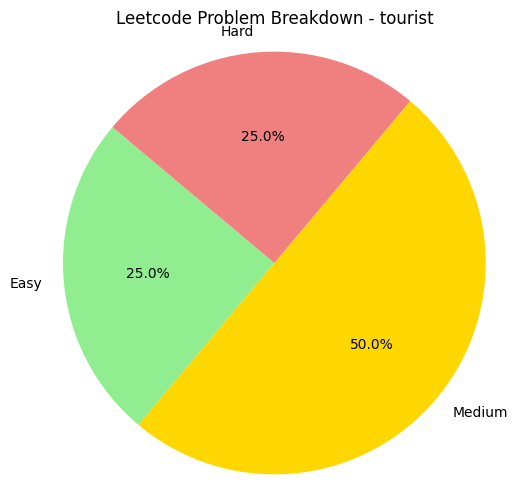

In [12]:
analyze_leetcode_profile("tourist")


In [13]:
from IPython.display import display, HTML

def compare_cf_leetcode(cf_stats, lc_stats):
    table_html = f"""
    <h3>📊 Competitive Programming Profile Comparison</h3>
    <table border="1" style="border-collapse: collapse; text-align: center; width: 80%;">
        <thead style="background-color: #f2f2f2;">
            <tr>
                <th>Platform</th>
                <th>Total Solved</th>
                <th>Easy</th>
                <th>Medium</th>
                <th>Hard</th>
                <th>Rating</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td><b>LeetCode</b></td>
                <td>{lc_stats['total']}</td>
                <td>{lc_stats['easy']}</td>
                <td>{lc_stats['medium']}</td>
                <td>{lc_stats['hard']}</td>
                <td>N/A</td>
            </tr>
            <tr>
                <td><b>Codeforces</b></td>
                <td>{cf_stats['accepted']}</td>
                <td>N/A</td>
                <td>N/A</td>
                <td>N/A</td>
                <td>{cf_stats['rating']}</td>
            </tr>
        </tbody>
    </table>
    """
    display(HTML(table_html))


In [15]:
# Replace with your actual numbers
cf_stats = {
    "accepted": 0,  # or actual accepted count from previous stats
    "rating": 0     # or your rating
}

lc_stats = {
    "total": 245,  # replace with actual total solved
    "easy": 95,
    "medium": 120,
    "hard": 30
}

compare_cf_leetcode(cf_stats, lc_stats)


Platform,Total Solved,Easy,Medium,Hard,Rating
LeetCode,245,95,120,30,N/A
Codeforces,0,N/A,N/A,N/A,0
